# Run model module locally

In [1]:
arguments = {}
# File arguments.
arguments["train_file_pattern"] = "gs://machine-learning-1234-bucket/gan/data/cifar10_car/train*.tfrecord"
arguments["eval_file_pattern"] = "gs://machine-learning-1234-bucket/gan/data/cifar10_car/test*.tfrecord"
arguments["output_dir"] = "gs://machine-learning-1234-bucket/gan/pgan/tf2/trained_model"

# Training parameters.
arguments["tf_version"] = 2.2
arguments["use_graph_mode"] = True
arguments["distribution_strategy"] = ""
arguments["write_summaries"] = False
arguments["num_epochs"] = 30
arguments["train_dataset_length"] = 10000
arguments["train_batch_size"] = 32
arguments["input_fn_autotune"] = False
arguments["log_step_count_steps"] = 100
arguments["save_summary_steps"] = 100
arguments["save_checkpoints_steps"] = 10000
arguments["keep_checkpoint_max"] = 10
arguments["export_every_growth_phase"] = True

# Eval parameters.
arguments["eval_batch_size"] = 32
arguments["eval_steps"] = 100

# Image parameters.
arguments["height"] = 32
arguments["width"] = 32
arguments["depth"] = 3

# Shared network parameters.
arguments["num_steps_until_growth"] = 5000
arguments["use_equalized_learning_rate"] = True

# Generator parameters.
arguments["generator_latent_size"] = 512
arguments["generator_normalize_latents"] = True
arguments["generator_use_pixel_norm"] = True
arguments["generator_pixel_norm_epsilon"] = 1e-8
arguments["generator_projection_dims"] = [4, 4, 512]
arguments["generator_leaky_relu_alpha"] = 0.2
arguments["generator_final_activation"] = "tanh"
arguments["generator_l1_regularization_scale"] = 0.
arguments["generator_l2_regularization_scale"] = 0.
arguments["generator_optimizer"] = "Adam"
arguments["generator_learning_rate"] = 0.001
arguments["generator_adam_beta1"] = 0.0
arguments["generator_adam_beta2"] = 0.99
arguments["generator_adam_epsilon"] = 1e-8
arguments["generator_clip_gradients"] = None
arguments["generator_train_steps"] = 1

# Discriminator hyperparameters.
arguments["discriminator_use_minibatch_stddev"] = True
arguments["discriminator_minibatch_stddev_group_size"] = 4
arguments["discriminator_minibatch_stddev_averaging"] = True
arguments["discriminator_leaky_relu_alpha"] = 0.2
arguments["discriminator_l1_regularization_scale"] = 0.
arguments["discriminator_l2_regularization_scale"] = 0.
arguments["discriminator_optimizer"] = "Adam"
arguments["discriminator_learning_rate"] = 0.001
arguments["discriminator_adam_beta1"] = 0.0
arguments["discriminator_adam_beta2"] = 0.99
arguments["discriminator_adam_epsilon"] = 1e-8
arguments["discriminator_clip_gradients"] = None
arguments["discriminator_gradient_penalty_coefficient"] = 10.0
arguments["discriminator_epsilon_drift"] = 0.001
arguments["discriminator_train_steps"] = 1


In [2]:
import math
import os

def convert_conv_layer_property_lists_to_string(property_list, prop_list_len):
    """Convert conv layer property list to string.

    Args:
        property_list: list, nested list of blocks of a conv layer property.
        prop_list_len: int, length of list to process.

    Returns:
        Doubly delimited string of conv layer property values.
    """
    return (";").join(
        [
            (",").join([str(val) for val in block])
            for block in property_list[0:prop_list_len]
        ]
    )

# Import os environment variables for file hyperparameters.
os.environ["TRAIN_FILE_PATTERN"] = arguments["train_file_pattern"]
os.environ["EVAL_FILE_PATTERN"] = arguments["eval_file_pattern"]
os.environ["OUTPUT_DIR"] = arguments["output_dir"]

# Import os environment variables for train hyperparameters.
os.environ["TF_VERSION"] = str(arguments["tf_version"])
os.environ["USE_GRAPH_MODE"] = str(arguments["use_graph_mode"])
os.environ["DISTRIBUTION_STRATEGY"] = arguments["distribution_strategy"]
os.environ["WRITE_SUMMARIES"] = str(arguments["write_summaries"])
os.environ["NUM_EPOCHS"] = str(arguments["num_epochs"])
os.environ["TRAIN_DATASET_LENGTH"] = str(arguments["train_dataset_length"])
os.environ["TRAIN_BATCH_SIZE"] = str(arguments["train_batch_size"])
os.environ["INPUT_FN_AUTOTUNE"] = str(arguments["input_fn_autotune"])
os.environ["LOG_STEP_COUNT_STEPS"] = str(arguments["log_step_count_steps"])
os.environ["SAVE_SUMMARY_STEPS"] = str(arguments["save_summary_steps"])
os.environ["SAVE_CHECKPOINTS_STEPS"] = (
    str(arguments["save_checkpoints_steps"])
)
os.environ["KEEP_CHECKPOINT_MAX"] = str(arguments["keep_checkpoint_max"])
os.environ["EXPORT_EVERY_GROWTH_PHASE"] = (
    str(arguments["export_every_growth_phase"])
)

# Import os environment variables for eval hyperparameters.
os.environ["EVAL_BATCH_SIZE"] = str(arguments["eval_batch_size"])
os.environ["EVAL_STEPS"] = str(arguments["eval_steps"])

# Import os environment variables for image hyperparameters.
os.environ["HEIGHT"] = str(arguments["height"])
os.environ["WIDTH"] = str(arguments["width"])
os.environ["DEPTH"] = str(arguments["depth"])

# Import os environment variables for shared network hyperparameters.
os.environ["NUM_STEPS_UNTIL_GROWTH"] = (
    str(arguments["num_steps_until_growth"])
)
os.environ["USE_EQUALIZED_LEARNING_RATE"] = (
    str(arguments["use_equalized_learning_rate"])
)

# Full lists for full 1024x1024 network growth.
full_conv_num_filters = [[512, 512], [512, 512], [512, 512], [512, 512], [256, 256], [128, 128], [64, 64], [32, 32], [16, 16]]
full_conv_kernel_sizes = [[4, 3], [3, 3], [3, 3], [3, 3], [3, 3], [3, 3], [3, 3], [3, 3], [3, 3]]
full_conv_strides = [[1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]]

# Set final image size as a multiple of 2, starting at 4.
image_size = 32
os.environ["IMAGE_SIZE"] = str(image_size)
prop_list_len = max(
    min(int(math.log(image_size, 2) - 1), len(full_conv_num_filters)), 1
)

# Get slices of lists.
conv_num_filters = convert_conv_layer_property_lists_to_string(
    full_conv_num_filters, prop_list_len
)
print("conv_num_filters = {}".format(conv_num_filters))
conv_kernel_sizes = convert_conv_layer_property_lists_to_string(
    full_conv_kernel_sizes, prop_list_len
)
print("conv_kernel_sizes = {}".format(conv_kernel_sizes))
conv_strides = convert_conv_layer_property_lists_to_string(
    full_conv_strides, prop_list_len
)
print("conv_strides = {}".format(conv_strides))

os.environ["CONV_NUM_FILTERS"] = conv_num_filters
os.environ["CONV_KERNEL_SIZES"] = conv_kernel_sizes
os.environ["CONV_STRIDES"] = conv_strides

# Import os environment variables for generator hyperparameters.
os.environ["GENERATOR_LATENT_SIZE"] = str(arguments["generator_latent_size"])
os.environ["GENERATOR_NORMALIZE_LATENTS"] = (
    str(arguments["generator_normalize_latents"])
)
os.environ["GENERATOR_USE_PIXEL_NORM"] = (
    str(arguments["generator_use_pixel_norm"])
)
os.environ["GENERATOR_PIXEL_NORM_EPSILON"] = (
    str(arguments["generator_pixel_norm_epsilon"])
)
os.environ["GENERATOR_PROJECTION_DIMS"] = ",".join(
    [str(x) for x in arguments["generator_projection_dims"]]
)
os.environ["GENERATOR_LEAKY_RELU_ALPHA"] = (
    str(arguments["generator_leaky_relu_alpha"])
)
os.environ["GENERATOR_FINAL_ACTIVATION"] = (
    arguments["generator_final_activation"]
)
os.environ["GENERATOR_L1_REGULARIZATION_SCALE"] = (
    str(arguments["generator_l1_regularization_scale"])
)
os.environ["GENERATOR_L2_REGULARIZATION_SCALE"] = (
    str(arguments["generator_l2_regularization_scale"])
)
os.environ["GENERATOR_OPTIMIZER"] = arguments["generator_optimizer"]
os.environ["GENERATOR_LEARNING_RATE"] = (
    str(arguments["generator_learning_rate"])
)
os.environ["GENERATOR_ADAM_BETA1"] = str(arguments["generator_adam_beta1"])
os.environ["GENERATOR_ADAM_BETA2"] = str(arguments["generator_adam_beta2"])
os.environ["GENERATOR_ADAM_EPSILON"] = (
    str(arguments["generator_adam_epsilon"])
)
os.environ["GENERATOR_CLIP_GRADIENTS"] = (
    str(arguments["generator_clip_gradients"])
)
os.environ["GENERATOR_TRAIN_STEPS"] = str(arguments["generator_train_steps"])

# Import os environment variables for discriminator hyperparameters.
os.environ["DISCRIMINATOR_USE_MINIBATCH_STDDEV"] = (
    str(arguments["discriminator_use_minibatch_stddev"])
)
os.environ["DISCRIMINATOR_MINIBATCH_STDDEV_GROUP_SIZE"] = (
    str(arguments["discriminator_minibatch_stddev_group_size"])
)
os.environ["DISCRIMINATOR_MINIBATCH_STDDEV_AVERAGING"] = (
    str(arguments["discriminator_minibatch_stddev_averaging"])
)
os.environ["DISCRIMINATOR_LEAKY_RELU_ALPHA"] = (
    str(arguments["discriminator_leaky_relu_alpha"])
)
os.environ["DISCRIMINATOR_L1_REGULARIZATION_SCALE"] = (
    str(arguments["discriminator_l1_regularization_scale"])
)
os.environ["DISCRIMINATOR_L2_REGULARIZATION_SCALE"] = (
    str(arguments["discriminator_l2_regularization_scale"])
)
os.environ["DISCRIMINATOR_OPTIMIZER"] = arguments["discriminator_optimizer"]
os.environ["DISCRIMINATOR_LEARNING_RATE"] = (
    str(arguments["discriminator_learning_rate"])
)
os.environ["DISCRIMINATOR_ADAM_BETA1"] = (
    str(arguments["discriminator_adam_beta1"])
)
os.environ["DISCRIMINATOR_ADAM_BETA2"] = (
    str(arguments["discriminator_adam_beta2"])
)
os.environ["DISCRIMINATOR_ADAM_EPSILON"] = (
    str(arguments["discriminator_adam_epsilon"])
)
os.environ["DISCRIMINATOR_GRADIENT_PENALTY_COEFFICIENT"] = (
    str(arguments["discriminator_gradient_penalty_coefficient"])
)
os.environ["DISCRIMINATOR_EPSILON_DRIFT"] = (
    str(arguments["discriminator_epsilon_drift"])
)
os.environ["DISCRIMINATOR_CLIP_GRADIENTS"] = (
    str(arguments["discriminator_clip_gradients"])
)
os.environ["DISCRIMINATOR_TRAIN_STEPS"] = (
    str(arguments["discriminator_train_steps"]))


conv_num_filters = 512,512;512,512;512,512;512,512
conv_kernel_sizes = 4,3;3,3;3,3;3,3
conv_strides = 1,1;1,1;1,1;1,1


In [4]:
%%bash
gsutil -m rm -rf ${OUTPUT_DIR}

Removing gs://machine-learning-1234-bucket/gan/pgan/tf2/trained_model/#1596792735456280...
Removing gs://machine-learning-1234-bucket/gan/pgan/tf2/trained_model/checkpoints/#1596792750059485...
Removing gs://machine-learning-1234-bucket/gan/pgan/tf2/trained_model/checkpoints/checkpoint#1596792753574826...
Removing gs://machine-learning-1234-bucket/gan/pgan/tf2/trained_model/checkpoints/ckpt-0.data-00000-of-00001#1596792752725405...
Removing gs://machine-learning-1234-bucket/gan/pgan/tf2/trained_model/checkpoints/ckpt-0.index#1596792752899959...
Removing gs://machine-learning-1234-bucket/gan/pgan/tf2/trained_model/summaries/#1596792735754514...
Removing gs://machine-learning-1234-bucket/gan/pgan/tf2/trained_model/summaries/events.out.tfevents.1596792735.tensorflow-2-3-20200728-220626.3085.964.v2#1596792735887369...
/ [7/7 objects] 100% Done                                                       
Operation completed over 7 objects.                                              


## Train Progressive GAN model

In [5]:
%%bash
gsutil -m rm -rf ${OUTPUT_DIR}
export PYTHONPATH=$PYTHONPATH:$PWD/pgan_class_ctl_module
python3 -m trainer.task \
    --train_file_pattern=${TRAIN_FILE_PATTERN} \
    --eval_file_pattern=${EVAL_FILE_PATTERN} \
    --output_dir=${OUTPUT_DIR} \
    --job-dir=./tmp \
    \
    --tf_version=${TF_VERSION} \
    --use_graph_mode=${USE_GRAPH_MODE} \
    --distribution_strategy=${DISTRIBUTION_STRATEGY} \
    --write_summaries=${WRITE_SUMMARIES} \
    --num_epochs=${NUM_EPOCHS} \
    --train_dataset_length=${TRAIN_DATASET_LENGTH} \
    --train_batch_size=${TRAIN_BATCH_SIZE} \
    --input_fn_autotune=${INPUT_FN_AUTOTUNE} \
    --log_step_count_steps=${LOG_STEP_COUNT_STEPS} \
    --save_summary_steps=${SAVE_SUMMARY_STEPS} \
    --save_checkpoints_steps=${SAVE_CHECKPOINTS_STEPS} \
    --keep_checkpoint_max=${KEEP_CHECKPOINT_MAX} \
    --export_every_growth_phase=${EXPORT_EVERY_GROWTH_PHASE} \
    \
    --eval_batch_size=${EVAL_BATCH_SIZE} \
    --eval_steps=${EVAL_STEPS} \
    \
    --height=${HEIGHT} \
    --width=${WIDTH} \
    --depth=${DEPTH} \
    \
    --num_steps_until_growth=${NUM_STEPS_UNTIL_GROWTH} \
    --use_equalized_learning_rate=${USE_EQUALIZED_LEARNING_RATE} \
    --conv_num_filters=${CONV_NUM_FILTERS} \
    --conv_kernel_sizes=${CONV_KERNEL_SIZES} \
    --conv_strides=${CONV_STRIDES} \
    \
    --generator_latent_size=${GENERATOR_LATENT_SIZE} \
    --generator_use_pixel_norm=${GENERATOR_USE_PIXEL_NORM} \
    --generator_pixel_norm_epsilon=${GENERATOR_PIXEL_NORM_EPSILON} \
    --generator_projection_dims=${GENERATOR_PROJECTION_DIMS} \
    --generator_leaky_relu_alpha=${GENERATOR_LEAKY_RELU_ALPHA} \
    --generator_final_activation=${GENERATOR_FINAL_ACTIVATION} \
    --generator_l1_regularization_scale=${GENERATOR_L1_REGULARIZATION_SCALE} \
    --generator_l2_regularization_scale=${GENERATOR_L2_REGULARIZATION_SCALE} \
    --generator_optimizer=${GENERATOR_OPTIMIZER} \
    --generator_learning_rate=${GENERATOR_LEARNING_RATE} \
    --generator_adam_beta1=${GENERATOR_ADAM_BETA1} \
    --generator_adam_beta2=${GENERATOR_ADAM_BETA2} \
    --generator_adam_epsilon=${GENERATOR_ADAM_EPSILON} \
    --generator_clip_gradients=${GENERATOR_CLIP_GRADIENTS} \
    --generator_train_steps=${GENERATOR_TRAIN_STEPS} \
    \
    --discriminator_use_minibatch_stddev=${DISCRIMINATOR_USE_MINIBATCH_STDDEV} \
    --discriminator_minibatch_stddev_group_size=${DISCRIMINATOR_MINIBATCH_STDDEV_GROUP_SIZE} \
    --discriminator_minibatch_stddev_averaging=${DISCRIMINATOR_MINIBATCH_STDDEV_AVERAGING} \
    --discriminator_leaky_relu_alpha=${DISCRIMINATOR_LEAKY_RELU_ALPHA} \
    --discriminator_l1_regularization_scale=${DISCRIMINATOR_L1_REGULARIZATION_SCALE} \
    --discriminator_l2_regularization_scale=${DISCRIMINATOR_L2_REGULARIZATION_SCALE} \
    --discriminator_optimizer=${DISCRIMINATOR_OPTIMIZER} \
    --discriminator_learning_rate=${DISCRIMINATOR_LEARNING_RATE} \
    --discriminator_adam_beta1=${DISCRIMINATOR_ADAM_BETA1} \
    --discriminator_adam_beta2=${DISCRIMINATOR_ADAM_BETA2} \
    --discriminator_adam_epsilon=${DISCRIMINATOR_ADAM_EPSILON} \
    --discriminator_clip_gradients=${DISCRIMINATOR_CLIP_GRADIENTS} \
    --discriminator_train_steps=${DISCRIMINATOR_TRAIN_STEPS}

{'train_file_pattern': 'gs://machine-learning-1234-bucket/gan/data/cifar10_car/train*.tfrecord', 'eval_file_pattern': 'gs://machine-learning-1234-bucket/gan/data/cifar10_car/test*.tfrecord', 'output_dir': 'gs://machine-learning-1234-bucket/gan/pgan/tf2/trained_model/', 'tf_version': 2.2, 'use_graph_mode': True, 'distribution_strategy': '', 'write_summaries': False, 'num_epochs': 30, 'train_dataset_length': 10000, 'train_batch_size': 32, 'input_fn_autotune': False, 'log_step_count_steps': 100, 'save_summary_steps': 100, 'save_checkpoints_steps': 10000, 'keep_checkpoint_max': 10, 'export_every_growth_phase': True, 'eval_batch_size': 32, 'eval_steps': 100, 'height': 32, 'width': 32, 'depth': 3, 'num_steps_until_growth': 5000, 'use_equalized_learning_rate': 'True', 'conv_num_filters': [[512, 512], [512, 512], [512, 512], [512, 512]], 'conv_kernel_sizes': [[4, 3], [3, 3], [3, 3], [3, 3]], 'conv_strides': [[1, 1], [1, 1], [1, 1], [1, 1]], 'generator_latent_size': 512, 'generator_normalize_la

CommandException: 1 files/objects could not be removed.
2020-08-07 09:37:48.764589: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-08-07 09:37:50.149112: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-08-07 09:37:50.869365: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-07 09:37:50.869974: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-08-07 09:37:50.870007: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-08-07 09:37:

## Prediction

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [7]:
!gsutil ls ${OUTPUT_DIR}/export

gs://machine-learning-1234-bucket/gan/pgan/tf2/trained_model/export/
gs://machine-learning-1234-bucket/gan/pgan/tf2/trained_model/export/20200807094128/
gs://machine-learning-1234-bucket/gan/pgan/tf2/trained_model/export/20200807094455/
gs://machine-learning-1234-bucket/gan/pgan/tf2/trained_model/export/20200807094826/
gs://machine-learning-1234-bucket/gan/pgan/tf2/trained_model/export/20200807095153/
gs://machine-learning-1234-bucket/gan/pgan/tf2/trained_model/export/20200807095524/
gs://machine-learning-1234-bucket/gan/pgan/tf2/trained_model/export/20200807095853/
gs://machine-learning-1234-bucket/gan/pgan/tf2/trained_model/export/20200807100227/
gs://machine-learning-1234-bucket/gan/pgan/tf2/trained_model/export/20200807100237/


In [8]:
loaded = tf.saved_model.load(
    export_dir=os.path.join(
        arguments["output_dir"], "export", "20200807100237"
    )
)
print(list(loaded.signatures.keys()))

['serving_default']


In [9]:
infer = loaded.signatures["serving_default"]
print(infer.structured_outputs)

{'generator_to_rgb_layers_conv2d_3_1x1_512_3': TensorSpec(shape=(32, 32, 32, 3), dtype=tf.float32, name='generator_to_rgb_layers_conv2d_3_1x1_512_3')}


In [10]:
Z = tf.random.normal(shape=(10, 512))
predictions = infer(Z)

Convert image back to the original scale.

In [11]:
generated_images = np.clip(
    a=tf.cast(
        x=((predictions[list(predictions.keys())[0]] + 1.0) * (255. / 2)),
        dtype=tf.int32
    ),
    a_min=0,
    a_max=255
)

In [12]:
print(generated_images.shape)

(10, 32, 32, 3)


In [13]:
def plot_images(images, args):
    """Plots images.

    Args:
        images: np.array, array of images of
            [num_images, image_size, image_size, num_channels].
    """
    num_images = len(images)

    plt.figure(figsize=(20, 20))
    for i in range(num_images):
        image = images[i]
        plt.subplot(1, num_images, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        if args["depth"] == 1:
            plt.imshow(
                tf.reshape(image, image.shape[:-1]), cmap="gray_r"
            )
        elif args["depth"] == 3:
            plt.imshow(image, cmap=plt.cm.binary)
    plt.show()


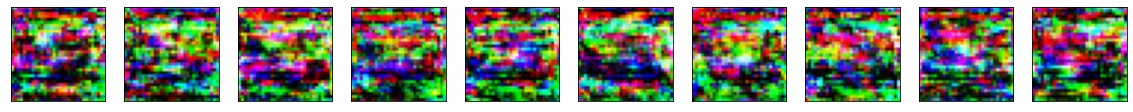

In [14]:
plot_images(images=generated_images, args=arguments)